In [3]:
%load_ext autoreload
%autoreload 2
from Ge_calculation import GAP, MD_run
from Ge_analysis import *
import pickle
from ase.io.cfg import read_cfg
import numpy as np
import os
from ase import build
from ase.atoms import Atoms
from quippy.potential import Potential
from quippy.descriptors import Descriptor
from copy import deepcopy
from ase.io.extxyz import read_xyz, write_xyz
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
os.chdir('/home/joe/Documents/Ge_od/Potentials/Si_myDB_supercrystals/GAP')

In [5]:
#experimental data
lSi_exp_Sq = np.genfromtxt('/home/joe/Documents/Ge_od/paper_data/Si_Sq_exp_Waseda1974.txt',
                          delimiter=', ').T
lSi_exp_Sq[1] += -0.5

aSi_exp_Sq = np.genfromtxt('/home/joe/Documents/Ge_od/paper_data/a-Si_x-ray_Laaziri1999.txt',
                          delimiter=', ').T
aSi_exp_gr = np.genfromtxt('/home/joe/Documents/Ge_od/paper_data/aSi-g-Lannin1988.txt',
                          delimiter=', ').T
Si_exp_lADF = np.genfromtxt('/home/joe/Documents/Ge_od/paper_data/l-Si_ADF_Bartok2018_DFT.txt',
                          delimiter=', ').T
Si_exp_lADF_GAP = np.genfromtxt('/home/joe/Documents/Ge_od/paper_data/l-Si_ADF_Bartok2018_GAP.txt',
                          delimiter=', ').T
Si_exp_RDF = np.genfromtxt('/home/joe/Documents/Ge_od/paper_data/l-Si_RDF_Bartok2018_DFT.txt',
                          delimiter=', ').T
Si_lGAP_RDF = np.genfromtxt('/home/joe/Documents/Ge_od/paper_data/l-Si_RDF_Bartok2018_GAP.txt',
                          delimiter=', ').T

In [6]:
plot = '/p_2/Documents/Ge_od/Potentials/Si_myDB_reduction_testing/plot_data'
Si_mlp1000_MD_l = np.genfromtxt(os.path.join(plot, "Si_mlp_myDBliqamo_1000_MD_liqSq.txt"),  delimiter=',')
Si_mlp1000_MD_a = np.genfromtxt(os.path.join(plot, "Si_mlp_myDBliqamo_1000_MD_amoSq.txt"),  delimiter=',')
Si_litDB_full_l = np.genfromtxt(os.path.join(plot, "Si_GAP_litDBfull_1000_MD_liqSq.txt"),  delimiter=',')
Si_litDB_full_a = np.genfromtxt(os.path.join(plot, "Si_GAP_litDBfull_1000_MD_amoSq.txt"),  delimiter=',')
Si_loomy_GAP1000_MD_l = np.genfromtxt(os.path.join(plot, "Si_GAP_myDBliqamo_1000_MD_liqSq.txt"),  delimiter=',')
Si_loomy_GAP1000_MD_a = np.genfromtxt(os.path.join(plot, "Si_GAP_myDBliqamo_1000_MD_amoSq.txt"),  delimiter=',')

In [5]:
ref_MDs_l = [Si_mlp1000_MD_l, Si_litDB_full_l, Si_loomy_GAP1000_MD_l]
ref_MDs_a = [Si_mlp1000_MD_a, Si_litDB_full_a, Si_loomy_GAP1000_MD_a]
ref_labels = ['MTP 1000', 'litDB_full 1000', 'GAP myDB loose']

In [6]:
red_MDs_Sqs = []
MTP_red_MDs_Sqs = []
red_labels = []
MTP_red_labels = []

for i in os.listdir(plot := '/p_2/Documents/Ge_od/Potentials/Si_myDB_reduction_testing/plot_data'):
    if 'GAP' in i and '_t_' in i and 'liqSq' in i:
        red_MDs_Sqs.append(np.genfromtxt(os.path.join(plot,i), delimiter=','))
        red_labels.append(i[14:17])
    if 'MTP' in i and '_t_' in i and 'liqSq' in i:
        MTP_red_MDs_Sqs.append(np.genfromtxt(os.path.join(plot,i), delimiter=','))
        MTP_red_labels.append(i[14:17])

In [7]:
red_MDs_Sqs_a = []
MTP_red_MDs_Sqs_a = []
red_labels_a = []
MTP_red_labels_a = []

for i in os.listdir(plot := '/p_2/Documents/Ge_od/Potentials/Si_myDB_reduction_testing/plot_data'):
    if 'GAP' in i and '_t_' in i and 'amoSq' in i:
        red_MDs_Sqs_a.append(np.genfromtxt(os.path.join(plot,i), delimiter=','))
        red_labels_a.append(i[14:17])
    if 'MTP' in i and '_t_' in i and 'amoSq' in i:
        MTP_red_MDs_Sqs_a.append(np.genfromtxt(os.path.join(plot,i), delimiter=','))
        MTP_red_labels_a.append(i[14:17])

In [8]:
GAP_crysts_64 = []

for i in os.listdir():
    if 'run_64' in i:
        GAP_crysts_64.append(MD_run(i, label=i[26:]))

In [9]:
for i in GAP_crysts_64:
    print(i.label)


t_loose_ns8000
t_loose_ns4000
t_tcryst_lliqamo


In [10]:
for i in GAP_crysts_64:
    i.structure_factors(selection=[i for i in range(30,120)]+[i for i in range(220,240)],
                    rings_dir='Sq_'+i.label,
                    opts={'Angles':True},
                    rings_in={'species':['Si']},
                    read_only=True)
    l_sel = [i for i in range(90)]
    a_sel = [i for i in range(90,110)]
    i.bin_fit(s_selection=l_sel, q_selection=[0.5,12])
    i.bin_fit(s_selection=a_sel, q_selection=[0.5,12])
    i.bin_bond_angle(s_selection=l_sel)
    i.bin_bond_angle(s_selection=a_sel)

In [24]:
MTP_crysts_1000 = []

for i in os.listdir('../MTP'):
    if 'run_1000' in i and ('24' in i or '26' in i or '22' in i):
        if i == 'run_1000_26_rb_8':
            MTP_crysts_1000.append(MD_run(os.path.join('../MTP', i), label='MTP_'+i[-8:], read_dat=False))
        else:
            MTP_crysts_1000.append(MD_run(os.path.join('../MTP', i), label='MTP_'+i[-8:]))
        print(MTP_crysts_1000[-1].label)

MTP__24_rb_8
MTP_24_rb_12
MTP__22_rb_8
MTP__26_rb_8


In [35]:
for i in MTP_crysts_1000:
    i.structure_factors(selection=[i for i in range(30,120)]+[i for i in range(220,240)],
                    rings_dir='../MTP/Sq_'+i.label,
                    opts={'Angles':True},
                    rings_in={'species':['Si']},
                    read_only=False)
    l_sel = [i for i in range(90)]
    a_sel = [i for i in range(90,110)]
    i.bin_fit(s_selection=l_sel, q_selection=[0.5,12])
    i.bin_fit(s_selection=a_sel, q_selection=[0.5,12])
    i.bin_bond_angle(s_selection=l_sel)
    i.bin_bond_angle(s_selection=a_sel)

R.I.N.G.S ran successfully
R.I.N.G.S ran successfully
R.I.N.G.S ran successfully
R.I.N.G.S ran successfully


In [ ]:
fig, axs = plt.subplots()
for ct, i in enumerate(ref_MDs_l):
    axs.errorbar(*i, yerr=None,
                label=ref_labels[ct])

for ct, i in enumerate(GAP_crysts_64):
    axs.errorbar(*i.Sq_x_av[0], yerr=None,
                label=i.label)

axs.plot(*lSi_exp_Sq, color='Gray', linewidth=2, label='Exp. l-Si')
axs.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

In [ ]:
fig, axs = plt.subplots()
for ct, i in enumerate(ref_MDs_a):
    axs.errorbar(*i, yerr=None,
                label=ref_labels[ct])

for ct, i in enumerate(GAP_crysts_64):
    axs.errorbar(*i.Sq_x_av[1], yerr=None,
                label=i.label)

axs.plot(*aSi_exp_Sq, color='Gray', linewidth=2, label='Exp. l-Si')
axs.set(xlim=(0, 12))
axs.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

Two plots above suggest that new GAP is competitive with other versions, need to do 1000 atom
simulation for a fair comparison. 8000 sparse points appears better

In [ ]:
fig, axs = plt.subplots()
for ct, i in enumerate(red_MDs_Sqs):
    axs.errorbar(*i, yerr=None,
                label=red_labels[ct])

for ct, i in enumerate(GAP_crysts_64):
    axs.errorbar(*i.Sq_x_av[0], yerr=None,
                label=i.label)

axs.plot(*lSi_exp_Sq, color='Gray', linewidth=2, label='Exp. l-Si')
axs.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

comparing MTPs with and without crystal structures:

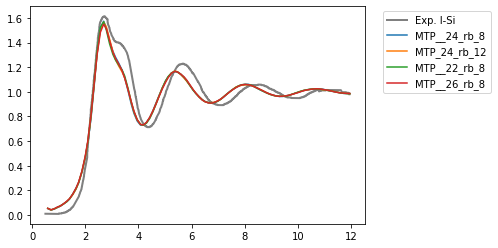

In [38]:
fig, axs = plt.subplots()
# for ct, i in enumerate(MTP_red_MDs_Sqs):
#     axs.errorbar(*i, yerr=None,
#                 label=MTP_red_labels[ct])

for ct, i in enumerate(MTP_crysts_1000):
    axs.errorbar(*i.Sq_x_av[0], yerr=None,
                label=i.label)
axs.plot(*lSi_exp_Sq, color='Gray', linewidth=2, label='Exp. l-Si')
axs.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

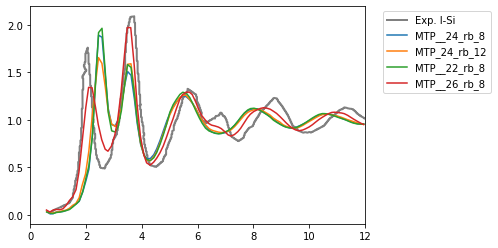

In [37]:
fig, axs = plt.subplots()
# for ct, i in enumerate(MTP_red_MDs_Sqs_a):
#     axs.errorbar(*i, yerr=None,
#                 label=MTP_red_labels[ct])

for ct, i in enumerate(MTP_crysts_1000):
    axs.errorbar(*i.Sq_x_av[1], yerr=None,
                label=i.label)
axs.plot(*aSi_exp_Sq, color='Gray', linewidth=2, label='Exp. l-Si')
axs.set(xlim=(0, 12))
axs.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

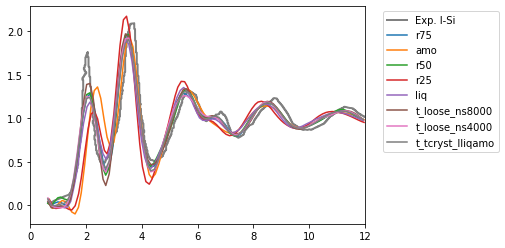

In [61]:
fig, axs = plt.subplots()
for ct, i in enumerate(red_MDs_Sqs_a):
    axs.errorbar(*i, yerr=None,
                label=red_labels_a[ct])

for ct, i in enumerate(GAP_crysts_64):
    axs.errorbar(*i.Sq_x_av[1], yerr=None,
                label=i.label)

axs.plot(*aSi_exp_Sq, color='Gray', linewidth=2, label='Exp. l-Si')
axs.set(xlim=(0, 12))
axs.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

In [ ]:
fig, axs = plt.subplots()
for ct, i in enumerate(MTP_red_MDs_Sqs_a):
    axs.errorbar(*i, yerr=None,
                label=MTP_red_labels_a[ct])

axs.plot(*aSi_exp_Sq, color='Gray', linewidth=2, label='Exp. l-Si')
axs.set(xlim=(0, 12))
axs.legend(bbox_to_anchor=(1.04, 1), loc='upper left')



ns 8000 appreciably improved FSP in amorphous (comparable with 4000 in the liquid)



* Get the 1000 atom GAP simulation down and look at S(q)
* compare the 24_rb_8 and 24_rb_12 MTPs - big difference between them suggests that optimisation of the
hypers can lead to big improvements.
* Still need to assess the correlation between RMSEs and accordance with experimental data

